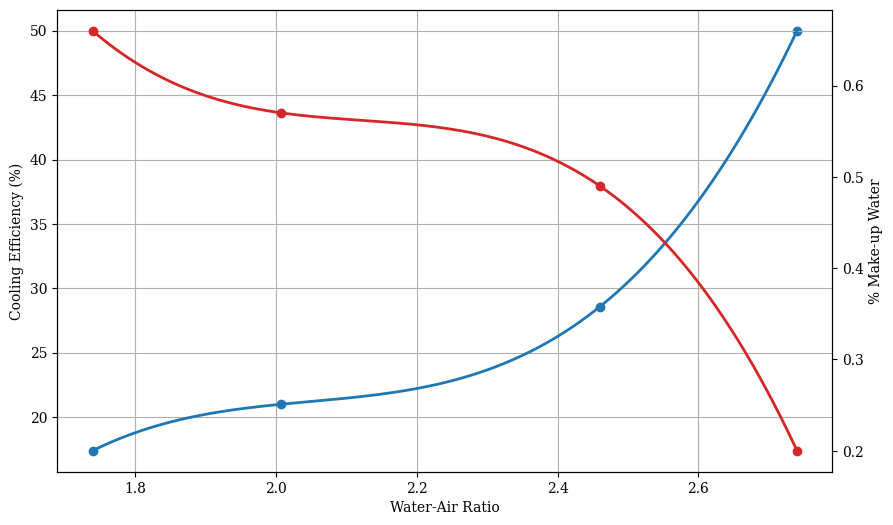

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['DejaVu Serif']

# Original data
x = np.array([2.74, 2.46, 2.008, 1.74])
cooling_eff = np.array([50, 28.57, 21, 17.39])
makeup_water = np.array([0.2, 0.49, 0.57, 0.66])

# Sort for smooth curve
idx = np.argsort(x)
x_sorted = x[idx]
cool_sorted = cooling_eff[idx]
makeup_sorted = makeup_water[idx]

# Smooth interpolation
x_smooth = np.linspace(x_sorted.min(), x_sorted.max(), 300)
cool_smooth = make_interp_spline(x_sorted, cool_sorted)(x_smooth)
makeup_smooth = make_interp_spline(x_sorted, makeup_sorted)(x_smooth)

# Create dual-axis plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Left axis (Cooling Efficiency)
ax1.plot(x_smooth, cool_smooth, linewidth=2, color='tab:blue')
ax1.scatter(x, cooling_eff, color='tab:blue')
ax1.set_xlabel("Water-Air Ratio")
ax1.set_ylabel("Cooling Efficiency (%)")
ax1.grid(True)

# Right axis (Makeup Water)
ax2 = ax1.twinx()
ax2.plot(x_smooth, makeup_smooth, linewidth=2, color='tab:red')
ax2.scatter(x, makeup_water, color='tab:red')
ax2.set_ylabel("% Make-up Water")

plt.savefig('exp1.png', dpi=600)
plt.show()
